#### Computer Vision - Fall 2020



## <span style="color:blue">Exercise 1 - Driver file </span>

In this exercise you will practice basic image operation as loading, saving and displaying an image, getting familiar with 'numpy' and the benefits of vectorized operations in Python. This exercise contains 2 parts:

1. Python warmup: working with images and library functions.
2. Implementing a classic Canny Edge Detector, evaluate the results and answering open questions.


## Read the following instructions carefully:
1. Write **efficient vectorized** code. When you think you cannot use vectorized code, give a short explanation why.
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests, unless requested.
3. Use `python 3` and `numpy 1.18.5`. Changes of the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden, unless been provided by us.
4. Your code must run without errors. Note,  **Code that fail to  run will not be graded.**
5. Document your code properly.



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# import ex1 as ex1

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [2]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.7.7
Numpy version:  1.18.5


## Section A: Convolution (15 pt)

1. 	Suggest a convolution mask (kernel)  that computes the average of a 1×9 pixels around each pixel. 
    Write the function convolutionMaskA(img) which gets an  np.array of an image and output the convolved image with your make. 
    You may use the convolve2d function from scipy.signal. *Make sure that you understand the differences between correlation and convolution.*\
    The result's plot should contains the original image and the convolved image side by side. Use captions on each image that indicates what you present. (Hint: see example in MoreOnBasic.py)
    
    
2. Suggest a convolution mask (kernel) of size *5×5* such that the maximal value over all possible grey level images (range 0 to 255) will be obtained in the center of a black  **'L'** shape region surrounded by white pixels.  Note, the rest of the image may contain any values.

    The  'L' shape region:\
    ``
    255 255 255 255 255
    255  0  255 255 255
    255  0  255 255 255
    255  0   0  255 255
    255 255 255 255 255 ``
    

3. Let '*' be a don't care value. Suggest as in 2 above a mask for the following region:\
    ``
     255 255 255 255 255
    255  0  255 255 255 
    255  0   *  255 255 
    255  0   0  255 255 
    255 255 255 255 255 ``
    
**Submit in the doc/pdf file:**  the three masks. \
**Submit in ex1.py:**  the required three functions as defined below.

**A question for thought (not for submission):**\
 What is the affect if you do not normalize the mask such that the sum of elements is one? 




In [3]:
## A ##

def convolutionMaskA(img):
    mask = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1]])*1/9
    resultConv = convolve2d(img, mask, mode='same')
    absResultConv = abs(resultConv)
    
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img, cmap='gray'), ax1.set_title('Original Image')
    ax2.imshow(absResultConv, cmap='gray'), ax2.set_title('Applying convolution mask')
    
    return absResultConv

    
def convolutionMaskB(img):
    mask = np.array([[0, 1, 1, 1, 1],
                     [0, 1, -1, -1, 1],
                     [0, 0, 1, -1, 1],
                     [0, 0, 1, -1, 1],
                     [0, 0, 1, 1, 1]])
    resultConv = convolve2d(img, mask, mode='same')
    absResultConv = abs(resultConv)

    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img, cmap='gray'), ax1.set_title('Original Image')
    ax2.imshow(absResultConv, cmap='gray'), ax2.set_title('Applying convolution mask')
    
    return absResultConv
    
    
def convolutionMaskC(img):
    mask = np.array([[0, 1, 1, 1, 1],
                     [0, 1, -1, -1, 1],
                     [0, 0, 0, -1, 1],
                     [0, 0, 1, -1, 1],
                     [0, 0, 1, 1, 1]])
    resultConv = convolve2d(img, mask, mode='same')
    absResultConv = abs(resultConv)

    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(img, cmap='gray'), ax1.set_title('Original Image')
    ax2.imshow(absResultConv, cmap='gray'), ax2.set_title('Applying convolution mask')

    return absResultConv


In [4]:
def test_A(imageName):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    convImageA = convolutionMaskA(img)
    
    convImageB = convolutionMaskB(img)
    
    convImageC = convolutionMaskC(img)

## Section B: Canny Edge Detector (50 pt)

In this section, you will implement the classic Canny edge detector, evaluate the results, and answer some questions. 

Reference: 
[F. J. Canny. A computational approach to edge detection. IEEE Trans. Pattern Analysis and Machine Intelligent (PAMI), 8(6):679-698, 1986.](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=4767851&casa_token=-KErvLLfyjQAAAAA:-Q-efDIF1sM3mJBrQfCZnqaPYftS4IspVi_9NR7kfmdx8AnFFmKSy5HnRjk2PpHpNR0VUOsw-ML4fw)


**B1.**  Write the function: *Canny('file_name', sigma, L_th, H_th)* \
Use the following steps:

1. Compute two kernels with the derivative of a Gaussian.   The parameters of the function are sigma and mask_size. \
   **Note**: The mask_size should contain 95% of the signal (correlated to the sigma's value). \
   **A question for thought (not for submission)**: what is the expected sum of the elements in the kernel? 
    
2. Using these masks compute two matrixes, *I_x* and *I_y*, with the derivatives of the image in the $x$ and in the $y$ directions, respectively.
3. Compute two matrices *G_orientation* and *G_magnitute* with the gradient  orientation and magnitude at each pixel. 

4. Compute non-maximum suppression (thinning) into a matrix. \
    **Note**: For computing non-maximum suppression, edge orientation should be rounded to be one of four orientations:
    Gradients that are approximately horizontal, approximately vertical, and approximately one of the diagonals (see figure). ![](NMS-orientation.jpg)

5. Edge Tracking by Hysteresis: use the two thresholds, *L_th*, *H_th*, to put it all together and compute the Canny edge detector. The output should be a binary map where an edge pixel is 1 and the rest are 0. \
**Hint**: For efficient vectorized code, you may want to use the function cv2.connectedComponents(img, connectivity=8)

[//]: # " "

**Submit in ex1.py:** the required functions as defined below.

The desire output should look like that: ![](ChurchRes.jpg)


In [5]:
## B.1.1 ##

def Deriv_Gauss_x(sig, l):
    """
    creates gaussian kernel in x direction 
    with size l x l and a sigma of sig
    Note: l should be odd. Otherwise, l is increased by 1.
    """
    
    if (l % 2) == 0: l=l+1  
   
    "Create a vector with values"
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    
    "Assigne two matrices with the appropriate x and y values \
    on which the gaussian function is computed"
    xx, yy = np.meshgrid(ax, ax)
    
    calc_gauss_derv_x = lambda x, y, sig: (-x/2*np.pi*sig**4)*np.exp((x**2+y**2)/2*sig**2)   
    kernel = calc_gauss_derv_x(xx, yy, sig)
    
    return kernel #return G_dy


def Deriv_Gauss_y(sig, l):
    """
    creates gaussian kernel in y direction 
    with size l x l and a sigma of sig
    Note: l should be odd. Otherwise, l is increased by 1.
    """
    
    if (l % 2) == 0: l=l+1  
   
    "Create a vector with values"
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    
    "Assigne two matrices with the appropriate x and y values \
    on which the gaussian function is computed"
    xx, yy = np.meshgrid(ax, ax)
    
    calc_gauss_derv_y = lambda x, y, sig: (-y/2*np.pi*sig**4)*np.exp((x**2+y**2)/2*sig**2)   
    kernel = calc_gauss_derv_y(xx, yy, sig)
    
    return kernel #return G_dy


In [6]:
## B.1.2 ##

def Grad_x(img, G_dx):
    """
    convolve the img with the x dirction Gaussian mask
    """
    resultConv = convolve2d(img, G_dx, mode='same')
    return resultConv #retrun Ix


def Grad_y(img, G_dy):
    """
    convolve the img with the x dirction Gaussian mask
    """
    resultConv = convolve2d(img, G_dy, mode='same')
    return resultConv #retrun Iy



In [7]:
## B.1.3 ##

def Grad_m(Ix, Iy):
    """
    compute the magnitude of each pixel
    """
    magnitude = np.sqrt(Ix**2+Iy**2)
    return magnitude #return G_magnitude


def Grad_o(Ix, Iy):
    """
    compute the orientation of each pixel
    """
    orientation = np.arctan2(Iy, Ix)*180/np.pi
    orientation[orientation < 0] += 180
    return orientation #return G_orientation


In [8]:
## B.1.4 ##

def thinning(G_m, G_o):
    """
    Compute non-maximum suppression (thinning) into a matrix
    """
    G_o = (G_o/45).round()*45 # making the orientation 0,45,90,135,180 degrees
    h, w = G_o.shape
    Et = np.zeros((h, w))
    
    for i in range(1,h-1):
        for j in range(1,w-1):
            
            # finding the neighbors
            n1, n2 = 0, 0
            if G_o[i,j] == 0.0 or G_o[i,j] == 180.0:
                n1 = G_m[i, j-1]
                n2 = G_m[i, j+1]
                
            elif G_o[i,j] == 45.0:
                n1 = G_m[i+1, j-1]
                n2 = G_m[i-1, j+1]
                
            elif G_o[i,j] == 90.0:
                n1 = G_m[i-1, j]
                n2 = G_m[i+1, j]
                
            elif G_o[i,j] == 135.0:
                n1 = G_m[i-1, j-1]
                n2 = G_m[i+1, j+1]
                
            # assigning the values
            if max(G_m[i,j], n1, n2) == G_m[i,j]:
                Et[i,j] = G_m[i,j]
            else: Et[i,j] = 0
    return Et
        

In [9]:
## B.1.5 ##

def threshold(ti, L_th=0, H_th=0):
    """
    filter image by given thresholds
    """
    
    L_th = L_th*255
    H_th = H_th*255
    thresh_img = np.zeros(ti.shape)
    
    ti = ti/ti.max()*255
    ti[ti < L_th] = 0 
    ti = np.uint8(ti)
    
#     kernel = np.ones((2,2))
#     ti = cv2.dilate(ti, kernel, iterations = 1)
    
    num_labels, labels = cv2.connectedComponents(ti, connectivity=8)
    
    for label in range(num_labels):
        if ti[labels == label].max() < H_th:
            thresh_img[labels == label] = 0
        else: thresh_img[labels == label] = 255
    
    return thresh_img


In [10]:
## B.1 ##

def Canny(imageName, sigma, L_th=0.1, H_th=0.3):
    """
    compute Canny edge detector for a given img
    note: L_th, H_th values between 0 to 1
    
    """
        
    mask_size = int(round(sigma*4))
    G_dx = Deriv_Gauss_x(sigma,mask_size)
    G_dy = Deriv_Gauss_y(sigma,mask_size)

    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    Ix = Grad_x(img, G_dx)
    Iy = Grad_y(img, G_dy)
    
    G_orientation = Grad_o(Ix, Iy)
    G_magnitude = Grad_m(Ix, Iy)
    
    Et = thinning(G_magnitude, G_orientation)
    
    canny_result = threshold(Et, L_th, H_th)
    
    return canny_result


[[ 0.61562512 -0.         -0.61562512]
 [ 0.48185258 -0.         -0.48185258]
 [ 0.61562512 -0.         -0.61562512]]


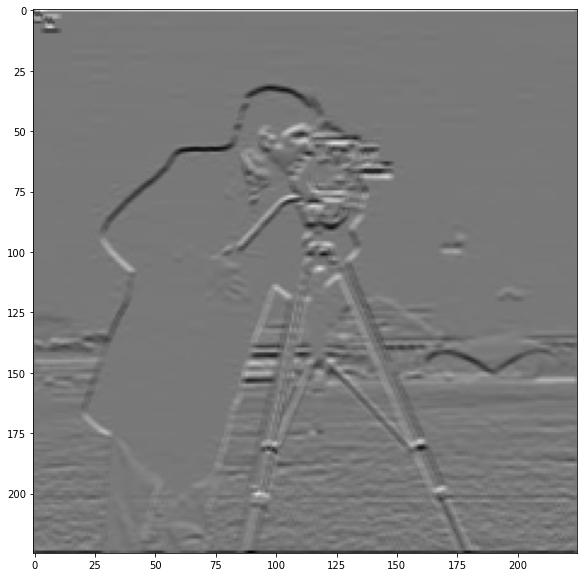

In [11]:
# Section B

def test_B(imageName, sigma, L_th, H_th):
    
    mask_size = int(round(sigma*4))  
    G_dx = Deriv_Gauss_x(sigma,mask_size)
    G_dy = Deriv_Gauss_y(sigma,mask_size)
    
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    
    Ix = Grad_x(img, G_dx)
    Iy = Grad_y(img, G_dy)
    
    G_orientation = Grad_o(Ix, Iy)
    G_magnitude = Grad_m(Ix, Iy)
    
    Et = thinning(G_magnitude, G_orientation)
    
    # now, encapsulate your code above under the function ex1.
    CannyResults = Canny(imageName, sigma, L_th, H_th)
    
    return CannyResults


imageName = './images/cameraman.jpg'
img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

sigma = 0.7
mask_size = int(round(sigma*4))  
G_dx = Deriv_Gauss_x(sigma,mask_size)
print(G_dx)
G_dy = Deriv_Gauss_y(sigma,mask_size)
Ix = Grad_x(img, G_dx)
Iy = Grad_y(img, G_dy)
plt.imshow(Iy)
G_magnitude = Grad_m(Ix, Iy)


**B2**. In this part you will apply your Canny edge detector and explore its parameters 

1. Test your functions on an image you choose. Explore various parameters and choose a set such that the result  looks “good”. \
**Submit in the doc/pdf file**: display the image you choosed, its esges, and the parameters you used. 

2. Run your Canny edge detector on the three given images: \
*Church.jpg, Golf.jpg, Nuns.jpg.*

3. Explore with different sets of parameters *sigma ,L_th, H_th*.

    **Submit in the doc/pdf file**:
Give a short explanation on how each of the Canny parameters affect the results. Show for each of your observations - a pair of images that support it.


## Section C: Evaluation (35 pt)

To measure the performance of an edge-detector, it is common to compare the detection results with those chosen manually by a person. The comparison is between two sets, the set E of pixels detected as edges and the ground truth set ($GT$) of pixels selected manually. To compare two sets, it is common to use the two measures, Precision ($P$) and Recall ($R$). A measure that combines $P$ and $R$ is the $F$ measure. The definition of the three measures are given by:

$$P = \frac{| E \cap GT\ | }{ |E|\ }, R = \frac{| E \cap GT\ | }{ |GT|\ } , F = 2\frac{PR}{P+R}$$

1. 	**Answer Theoretically**: \
    **a.** Which choice of Canny's parameters will cause P to be high?\
    **b.** Which choice of Canny's parameters will cause R to be high?
    
2. Write the function: evaluate_edges(res,GT) that output the three measures, $P$, $R$ and $F$. Make sure to handle division by zero.
    
3.	Use the given GT results (*Church_GT.bmp, Golf_GT.bmp, Nuns_GT.bmp*) on the three images, and compute the $P$, $R$, and $F$ values for a set of 27 parameters (a combination of 3 values for each parameters).\
Note: These are binary images

4. **In the doc/pdf file:** List 3 values you considered for each of the  parameters, and display the best set for each of the measure for each of the images. The tiltle should contain the parameters and the three evaluation measures.

    **A question for thought (not for submission)**\
    **a.** 	For the same image, does the same set of parameters gives best results for all the three measures (P,R,F)?\
    **b.**  For the same set of parameters, are the measures $P$, $R$ and $F$ have thes same values on all the images?


5. A $GT$ pixel may be shifted by one pixel with respect to the computed edges. Write a python function that is tolerant to such a shift\
[P,R,F]=evaluate_edges_shift_tolerant(E,E_GT).\
**Hints:** \
**a.** You can convolve the image with a mask to shift the image one pixel to a given direction.\
**b.** Another possibility is to use *cv2.dilate()* function with the kernel *np.ones((2,2))*.\
**b.** You should make sure that each pixel in $E$ that overlap a pixel in $GT$ or is a pixel away from the $GT$ is counted only once.\
**c.** You should make sure that the evaluation results are improved with respect to those obtain without the shift. 


**Submit in the doc/pdf file**: answers to 1 and 4.\
**Submit in ex1.py:** The required function as defined below.




In [12]:
## C.2 ##

def evaluate_edges(resultCanny, imgGT):
    """
    evalute img with img_GT
    """
    resultCanny[resultCanny>0] = 1
    
    e_gt = np.logical_and(resultCanny != 0, imgGT != 0).sum()
    e = resultCanny.sum()
    gt = imgGT.sum()
    try:    
        P = e_gt/e
        R = e_gt/gt        
        F=(2*P*R)/(P+R)
    except ZeroDivisionError: print("divide by zero")
    
    return [P, R, F]
    

In [13]:
## C.3 ##

def best_pram(img,img_gt):
    """
    trying diffrenet parameters for sigma, l_th, h_th -> evalute them and saving
    the best values
    """
    
    # best_values_ = [P, R, F, sig, l_th, H_th, Canny_img]
    best_values_P=[0,0,0,0,0,0,0]
    best_values_R=[0,0,0,0,0,0,0]
    best_values_F=[0,0,0,0,0,0,0]

    sigma=[1, 1.3, 1.5]
    L_th=[0.1, 0.2, 0.3, 0.4]
    H_th= [0.15, 0.35, 0.45, 0.6]

    for s in sigma:
        for l in L_th:
            for h in H_th:
                a=Canny(img,s,l,h) 

                a_GT = cv2.imread(img_gt, cv2.IMREAD_GRAYSCALE)
                metrics = evaluate_edges(a,a_GT)
                P=round(metrics[0], 4)
                R=round(metrics[1], 4)
                F=round(metrics[2], 4)
                
#                 print(f'P: {P}, R: {R}, F: {F}, with values: sig:{s}, L_th:{l}, H_th:{h}')
                
                if(P>=best_values_P[0]):
                    best_values_P=[P,R,F,s,l,h,a]
                    
                if(R>=best_values_R[1]):
                    best_values_R=[P,R,F,s,l,h,a]
                    
                if(F>=best_values_F[2]):
                    best_values_F=[P,R,F,s,l,h,a]
                    
    plt.figure()
    plt.title("for the best P the values are P={} R={} F={} pram are: sigma={}   L_th={}   H_th={}".format(*best_values_P))
    plt.imshow(best_values_P[-1], cmap='gray')

    plt.figure()
    plt.title("for the best R the values are P={} R={} F={} pram are: sigma={}   L_th={}   H_th={}".format(*best_values_R))
    plt.imshow(best_values_R[-1], cmap='gray')

    plt.figure()
    plt.title("for the best F the values are P={} R={} F={} pram are: sigma={}   L_th={}   H_th={}".format(*best_values_F))
    plt.imshow(best_values_F[-1], cmap='gray')

    
    return best_values_P,best_values_R,best_values_F



best pram for ./images/Golf.jpg


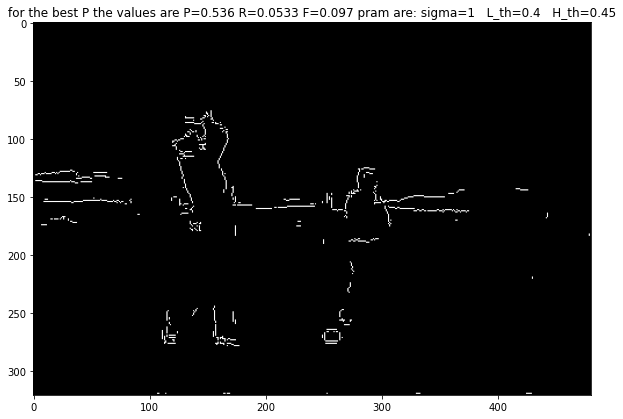

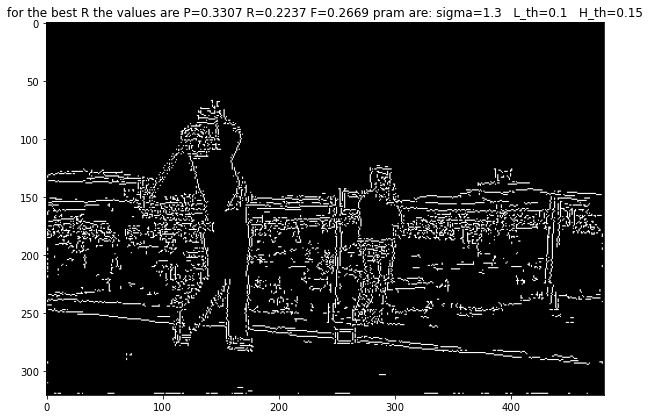

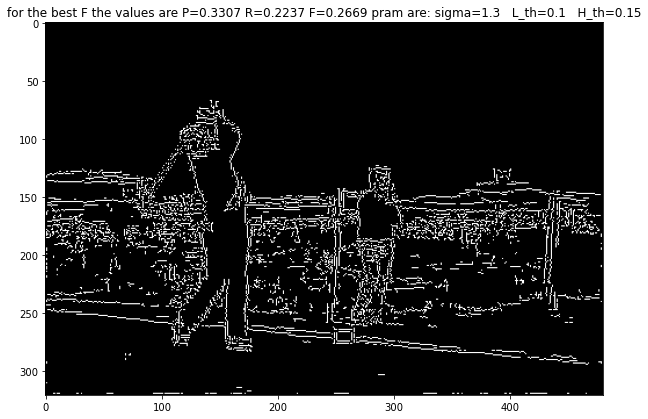

In [14]:
## C.3 ## C.4 ##

imageGolf = './images/Golf.jpg'
imageGolf_GT='./images/Golf_GT.bmp'

best_values_P,best_values_R,best_values_F= best_pram(imageGolf,imageGolf_GT)
print('best pram for {}'.format(imageGolf))

best pram for ./images/Church.jpg


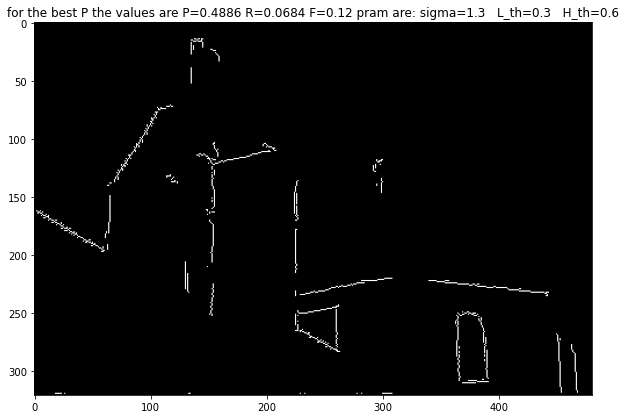

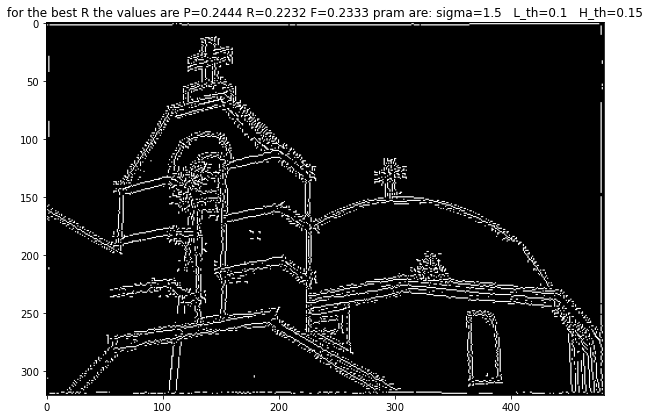

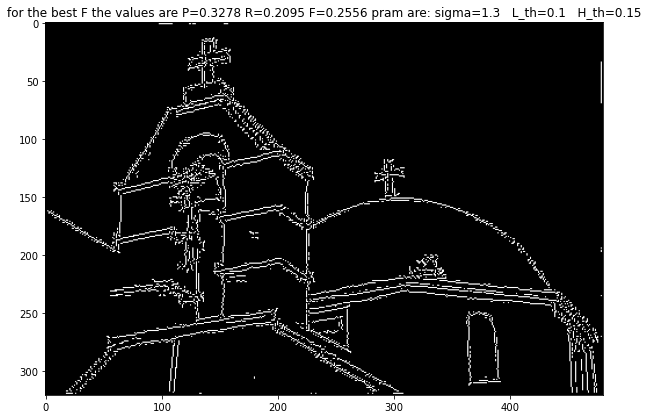

In [15]:
## C.3 ## C.4 ##

imageChurch='./images/Church.jpg'
imageChurch_GT='./images/Church_GT.bmp'

best_values_P,best_values_R,best_values_F= best_pram(imageChurch,imageChurch_GT)
print('best pram for {}'.format(imageChurch))

best pram for ./images/Nuns.jpg


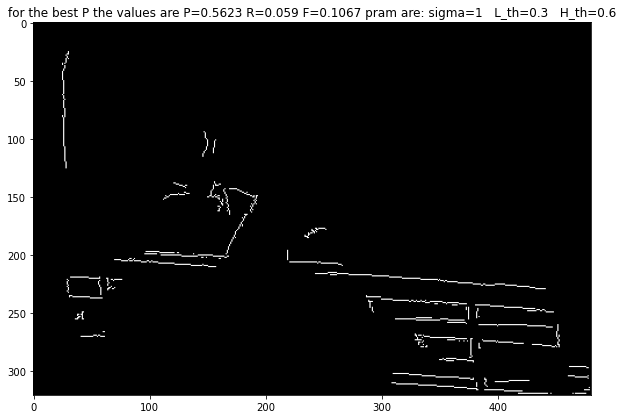

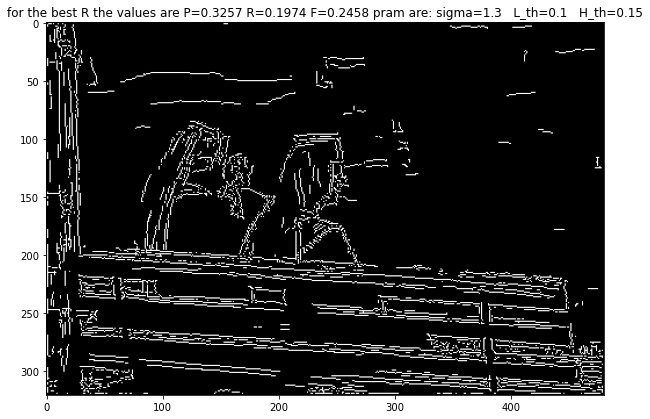

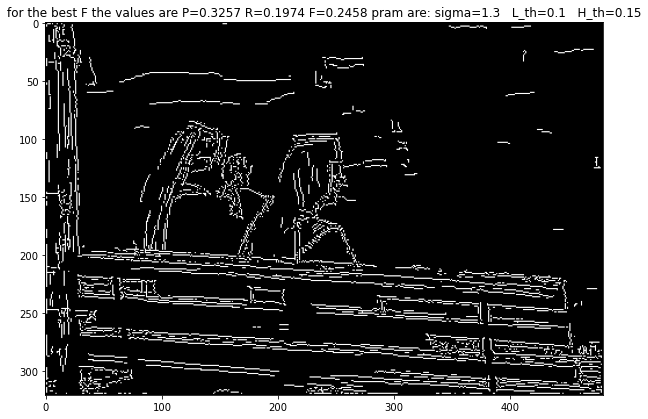

In [16]:
## C.3 ## C.4 ##

imageNuns ='./images/Nuns.jpg'
imageNuns_GT='./images/Nuns_GT.bmp'

best_values_P,best_values_R,best_values_F= best_pram(imageNuns,imageNuns_GT)
print('best pram for {}'.format(imageNuns))

In [17]:
## C.5 ##

def evaluate_edges_shift_tolerant(resultCanny, imgGT):
    """
    evalute img with img_GT including edge shift
    """
    
    resultCanny[resultCanny>0] = 1
    
    kernel = np.ones((2,2),np.uint8)
    resultCanny_D = cv2.dilate(resultCanny, kernel, iterations = 1)
    imgGT_D = cv2.dilate(imgGT,kernel,iterations = 1)
    
    E_GT_P = np.logical_and(resultCanny != 0, imgGT_D != 0) 
    E_GT_R = np.logical_and(resultCanny_D != 0, imgGT != 0) 
    
    try:
        P=E_GT_P.sum()/resultCanny.sum()
        R=E_GT_R.sum()/imgGT.sum()        
        F=(2*P*R)/(P+R)
    except ZeroDivisionError: print("divide by zero")

    return [P, R, F]
    

In [18]:
# Section C

def evaluate_edgeDetector(resCanny, imageNameGT):
    imgGT = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    [P, R, F] = evaluate_edges(resCanny, imgGT)
    [Pd, Rd, Fd] = evaluate_edges_shift_tolerant(resCanny, imgGT)
    


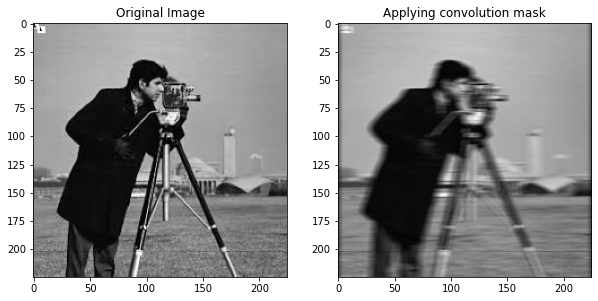

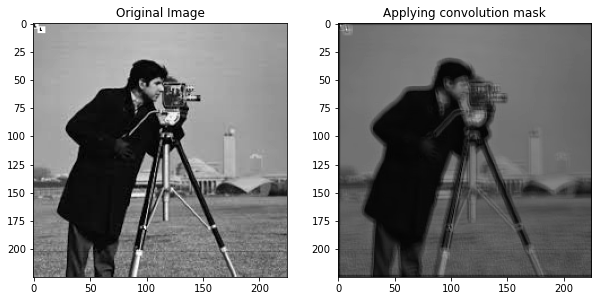

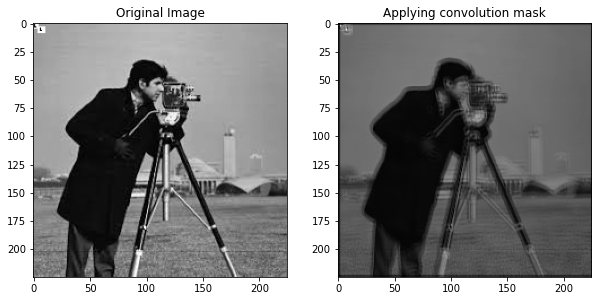

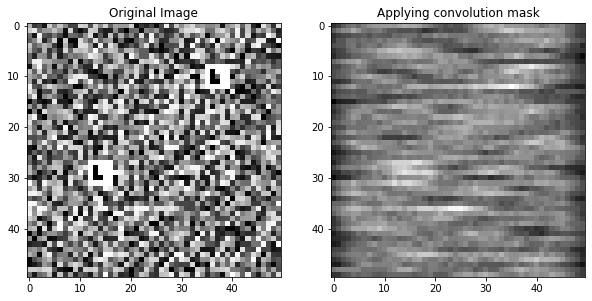

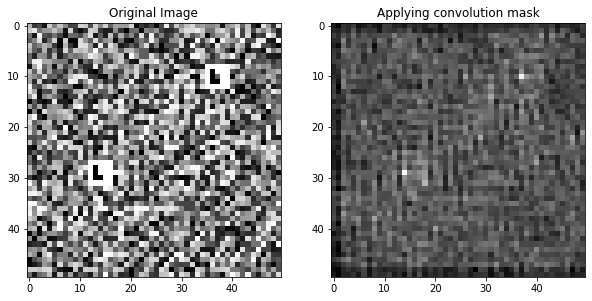

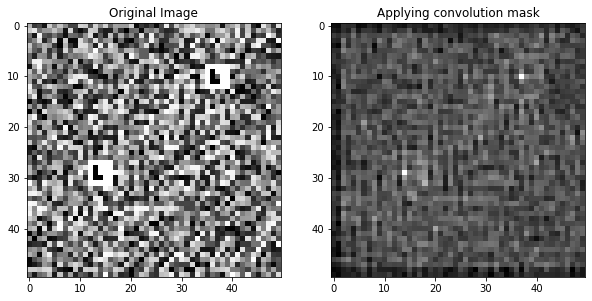

In [19]:
if __name__ == "__main__":
    #test A
    imageName = './images/cameraman.jpg'
    test_A(imageName)

    synthName = './images/synthCheck.tif'
    test_A(synthName)
    
    #test B
    imageName = './images/Church.jpg'
    sigma, L_th, H_th  = 1.3, 0.1 , 0.15
    resultCanny = test_B(imageName,sigma, L_th, H_th)

    #test C
    imageNameGT = './images/Church_GT.jpg'
    evaluate_edgeDetector(resultCanny, imageNameGT)
